# EDA

In [1]:
# Imports

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.set_context('talk')

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss

Using TensorFlow backend.
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/flatironschool/.local/lib/pytho

In [2]:
# Decided to work with the recent file from 2018
# https://www.kaggle.com/kemical/kickstarter-projects

df = pd.read_csv('ks-projects-201801.csv')

In [3]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [10]:
# Changed the format of launched and deadline to datetime for manipulation

df['deadline'] = pd.to_datetime(df['deadline']).dt.date
df['launched'] = pd.to_datetime(df['launched']).dt.date

In [11]:
# Created new column with the amount of days each project has to reach the goal

df['time_days'] = df['deadline'] - df['launched']

In [12]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.00,failed,0,GB,0.00,0.00,1533.95,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.00,failed,15,US,100.00,2421.00,30000.00,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.00,failed,3,US,220.00,220.00,45000.00,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.00,failed,1,US,1.00,1.00,5000.00,30 days
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.00,canceled,14,US,1283.00,1283.00,19500.00,56 days
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.00,successful,224,US,52375.00,52375.00,50000.00,35 days
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.00,successful,16,US,1205.00,1205.00,1000.00,20 days
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.00,failed,40,US,453.00,453.00,25000.00,45 days
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24,8233.00,canceled,58,US,8233.00,8233.00,125000.00,35 days
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11,6240.57,canceled,43,US,6240.57,6240.57,65000.00,30 days


In [13]:
# Extracted just the amount of days from the datetime format

df['time_days'] = df['time_days'].dt.days

In [14]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.00,failed,0,GB,0.00,0.00,1533.95,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.00,failed,15,US,100.00,2421.00,30000.00,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.00,failed,3,US,220.00,220.00,45000.00,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.00,failed,1,US,1.00,1.00,5000.00,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.00,canceled,14,US,1283.00,1283.00,19500.00,56
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.00,successful,224,US,52375.00,52375.00,50000.00,35
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.00,successful,16,US,1205.00,1205.00,1000.00,20
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.00,failed,40,US,453.00,453.00,25000.00,45
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24,8233.00,canceled,58,US,8233.00,8233.00,125000.00,35
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11,6240.57,canceled,43,US,6240.57,6240.57,65000.00,30


In [15]:
# Extracted just the month from the launch date

df['launched'] = df['launched'].apply(lambda d: d.month)

In [16]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,8,0.00,failed,0,GB,0.00,0.00,1533.95,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,9,2421.00,failed,15,US,100.00,2421.00,30000.00,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,1,220.00,failed,3,US,220.00,220.00,45000.00,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,3,1.00,failed,1,US,1.00,1.00,5000.00,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,7,1283.00,canceled,14,US,1283.00,1283.00,19500.00,56
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2,52375.00,successful,224,US,52375.00,52375.00,50000.00,35
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,12,1205.00,successful,16,US,1205.00,1205.00,1000.00,20
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2,453.00,failed,40,US,453.00,453.00,25000.00,45
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,4,8233.00,canceled,58,US,8233.00,8233.00,125000.00,35
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,7,6240.57,canceled,43,US,6240.57,6240.57,65000.00,30


In [17]:
df.groupby(df.country).count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
country,,,,,,,,,,,,,,,,
AT,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597
AU,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839
BE,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617
CA,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756
CH,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761
DE,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171
DK,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
ES,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276
FR,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939


In [18]:
df.groupby(['country', 'state']).count()

ID    name  category  main_category  currency  \
country state                                                           
AT      canceled        91      91        91             91        91   
        failed         378     378       378            378       378   
        live            15      15        15             15        15   
        successful     107     107       107            107       107   
        suspended        6       6         6              6         6   
AU      canceled      1065    1065      1065           1065      1065   
        failed        4606    4606      4606           4606      4606   
        live            70      70        70             70        70   
        successful    2010    2010      2010           2010      2010   
        suspended       88      88        88             88        88   
BE      canceled        74      74        74             74        74   
        failed         371     371       371            371       371   
        live            12      12        12             12        12   
        successful     152     152       152            152       152   
        suspended        8       8         8              8         8   
CA      canceled      2138    2138      2138           2138      2138   
        failed        8236    8236      8236           8236      8236   
        live           132     132       132            132       132   
        successful    4134    4134      4134           4134      4134   
        suspended      116     116       116            116       116   
CH      canceled        84      84        84             84        84   
        failed         465     465       465            465       465   
        live            14      14        14             14        14   
        successful     187     187       187            187       187   
        suspended       11      11        11             11        11   
DE      canceled       621     621       621            621       621   
        failed        2499    2499      2499           2499      2499   
        live            75      75        75             75        75   
        successful     937     937       937            937       937   
        suspended       39      39        39             39        39   
...                    ...     ...       ...            ...       ...   
NL      canceled       396     396       396            396       396   
        failed        1794    1794      1794           1794      1794   
        live            35      35        35             35        35   
        successful     617     617       617            617       617   
        suspended       26      26        26             26        26   
NO      canceled       112     112       112            112       112   
        failed         420     420       420            420       420   
        live             8       8         8              8         8   
        successful     162     162       162            162       162   
        suspended        6       6         6              6         6   
NZ      canceled       151     151       151            151       151   
        failed         826     826       826            826       826   
        live            11      11        11             11        11   
        successful     448     448       448            448       448   
        suspended       11      11        11             11        11   
SE      canceled       209     209       209            209       209   
        failed        1000    1000      1000           1000      1000   
        live            20      20        20             20        20   
        successful     509     509       509            509       509   
        suspended       19      19        19             19        19   
SG      canceled        67      67        67             67        67   
        failed         276     276       276            276       276   
        l

In [19]:
# Dropped the live projects

df = df[df['state'] != 'live']

In [20]:
# Classified canceled and suspended projects as failed as well; binary state

df['state'] = df['state'].map({'successful': 1, 'failed': 0, 'canceled': 0, 'suspended': 0})

In [21]:
df.groupby(['country', 'state']).count()

ID    name  category  main_category  currency  deadline  \
country state                                                                
AT      0         475     475       475            475       475       475   
        1         107     107       107            107       107       107   
AU      0        5759    5759      5759           5759      5759      5759   
        1        2010    2010      2010           2010      2010      2010   
BE      0         453     453       453            453       453       453   
        1         152     152       152            152       152       152   
CA      0       10490   10490     10490          10490     10490     10490   
        1        4134    4134      4134           4134      4134      4134   
CH      0         560     560       560            560       560       560   
        1         187     187       187            187       187       187   
DE      0        3159    3159      3159           3159      3159      3159   
        1         937     937       937            937       937       937   
DK      0         737     737       737            737       737       737   
        1         360     360       360            360       360       360   
ES      0        1732    1732      1732           1732      1732      1732   
        1         492     492       492            492       492       492   
FR      0        1979    1979      1979           1979      1979      1979   
        1         908     908       908            908       908       908   
GB      0       21325   21325     21325          21325     21325     21325   
        1       12067   12067     12067          12067     12067     12067   
HK      0         367     367       367            367       367       367   
        1         216     216       216            216       216       216   
IE      0         593     593       593            593       593       593   
        1         207     207       207            207       207       207   
IT      0        2363    2363      2363           2363      2363      2363   
        1         439     439       439            439       439       439   
JP      0          24      24        24             24        24        24   
        1           7       7         7              7         7         7   
LU      0          42      42        42             42        42        42   
        1          19      19        19             19        19        19   
MX      0        1249    1249      1249           1249      1249      1249   
        1         396     396       396            396       396       396   
NL      0        2216    2216      2216           2216      2216      2216   
        1         617     617       617            617       617       617   
NO      0         538     538       538            538       538       538   
        1         162     162       162            162       162       162   
NZ      0         988     988       988            988       988       988   
        1         448     448       448            448       448       448   
SE      0        1228    1228      1228           1228      1228      1228   
        1         509     509       509            509       509       509   
SG      0         349     349       349            349       349       349   
        1         178     178       178            178       178       178   
US      0      181585  181585    181585         181585    181585    181585   
        1      109299  109299    109299         109299    109299    109299   

                 goal  launched  pledged  backers  usd pledged  \
country state                                                    
AT      0         475       475      475      475          475   
        1         107       107      107      107          107   
AU      0        5759      5759     5759     5759         5759   
        1        2010      2010     2010     2010         2010   
BE      0         453       453   

## US

In [22]:
us = df[df['country'] == 'US']

In [23]:
us.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,9,2421.00,0,15,US,100.00,2421.00,30000.0,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,1,220.00,0,3,US,220.00,220.00,45000.0,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,3,1.00,0,1,US,1.00,1.00,5000.0,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,7,1283.00,0,14,US,1283.00,1283.00,19500.0,56
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2,52375.00,1,224,US,52375.00,52375.00,50000.0,35
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,12,1205.00,1,16,US,1205.00,1205.00,1000.0,20
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2,453.00,0,40,US,453.00,453.00,25000.0,45
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,4,8233.00,0,58,US,8233.00,8233.00,125000.0,35
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,7,6240.57,0,43,US,6240.57,6240.57,65000.0,30
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,3,12700.00,1,100,US,12700.00,12700.00,12500.0,30


In [24]:
us.groupby(['main_category', 'state']).count()

ID   name  category  currency  deadline   goal  \
main_category state                                                      
Art           0      12690  12690     12690     12690     12690  12690   
              1       9496   9496      9496      9496      9496   9496   
Comics        0       4031   4031      4031      4031      4031   4031   
              1       4820   4820      4820      4820      4820   4820   
Crafts        0       4962   4962      4962      4962      4962   4962   
              1       1640   1640      1640      1640      1640   1640   
Dance         0       1128   1128      1128      1128      1128   1128   
              1       2088   2088      2088      2088      2088   2088   
Design        0      13837  13837     13837     13837     13837  13837   
              1       7681   7681      7681      7681      7681   7681   
Fashion       0      12316  12316     12316     12316     12316  12316   
              1       4120   4120      4120      4120      4120   4120   
Film & Video  0      31927  31927     31927     31927     31927  31927   
              1      19782  19782     19782     19782     19782  19782   
Food          0      14462  14462     14462     14462     14462  14462   
              1       5350   5350      5350      5350      5350   5350   
Games         0      15115  15115     15115     15115     15115  15115   
              1       9356   9356      9356      9356      9356   9356   
Journalism    0       2721   2721      2721      2721      2721   2721   
              1        798    798       798       798       798    798   
Music         0      21326  21326     21326     21326     21326  21326   
              1      21718  21718     21718     21718     21718  21718   
Photography   0       5417   5417      5417      5417      5417   5417   
              1       2541   2541      2541      2541      2541   2541   
Publishing    0      21563  21563     21563     21563     21563  21563   
              1       9965   9965      9965      9965      9965   9965   
Technology    0      16631  16631     16631     16631     16631  16631   
              1       4723   4723      4723      4723      4723   4723   
Theater       0       3459   3459      3459      3459      3459   3459   
              1       5221   5221      5221      5221      5221   5221   

                     launched  pledged  backers  country  usd pledged  \
main_category state                                                     
Art           0         12690    12690    12690    12690        12690   
              1          9496     9496     9496     9496         9496   
Comics        0          4031     4031     4031     4031         4031   
              1          4820     4820     4820     4820         4820   
Crafts        0          4962     4962     4962     4962         4962   
              1          1640     1640     1640     1640         1640   
Dance         0          1128     1128     1128     1128         1128   
              1          2088     2088     2088     2088         2088   
Design        0         13837    13837    13837    13837        13837   
              1          7681     7681     7681     7681         7681   
Fashion       0         12316    12316    12316    12316        12316   
              1          4120     4120     4120     4120         4120   
Film & Video  0         31927    31927    31927    31927        31927   
              1         19782    19782    19782    19782        19782   
Food          0         14462    14462    14462    14462        14462   
              1          5350     5350     5350     5350         5350   
Games         0         15115    15115    15115    15115        15115   
              1          9356     9356     9356     9356         9356   
Journalism    0          2721     2721     2721     2721         2721   
              1           798      798      798      798          798   
Music         0         21326    21326    21326  

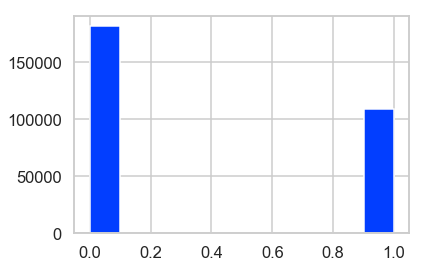

In [25]:
us['state'].hist()

In [26]:
us.groupby('state').count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
state,,,,,,,,,,,,,,,
0,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585,181585
1,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299,109299


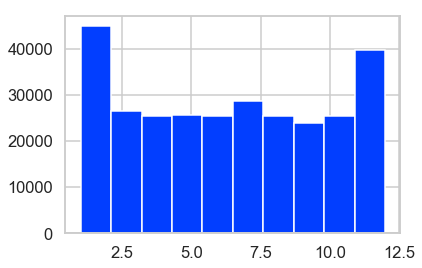

In [27]:
us['launched'].hist()

In [28]:
us['time_days'].mean()

34.71290617565765

In [29]:
us['time_days'].min()

1

In [30]:
us['time_days'].max()

14867

In [31]:
us[us['time_days'] == 14867]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1,0.0,0,0,US,0.0,0.0,5000.0,14867


In [32]:
us[us['name'].str.endswith('(Canceled)')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,7,6240.57,0,43,US,6240.57,6240.57,65000.0,30
93,10003650,Glyscian Debut Album Recording (Canceled),Rock,Music,USD,2012-05-26,15000.0,3,151.00,0,4,US,151.00,151.00,15000.0,60
201,1000827504,The JANIS JOPLIN Project (Canceled),Photography,Photography,USD,2012-08-21,11000.0,7,75.00,0,1,US,75.00,75.00,11000.0,42
231,100101652,Objecthood: A Story of an Imagined Economy (Ca...,Art Books,Publishing,USD,2011-08-12,15000.0,7,25.00,0,1,US,25.00,25.00,15000.0,21
302,100134337,Danger! Extreme Lawn Darts (Canceled),Video Games,Games,USD,2012-05-30,10000.0,5,60.00,0,3,US,60.00,60.00,10000.0,15
342,1001548662,Audience of Death (Canceled),Fiction,Publishing,USD,2015-04-17,4500.0,3,0.00,0,0,US,0.00,0.00,4500.0,45
355,1001600663,CLEX - 4 in 1 Smart Device (Canceled),Gadgets,Technology,USD,2016-07-18,50000.0,6,5650.00,0,22,US,5650.00,5650.00,50000.0,35
397,1001856035,The Daisy Dare Project (Canceled),Mixed Media,Art,USD,2011-12-10,2000.0,11,0.00,0,0,US,0.00,0.00,2000.0,36
432,100207951,Face-To-Face: Short Film (Canceled),Shorts,Film & Video,USD,2012-07-14,600.0,6,10.00,0,1,US,10.00,10.00,600.0,17
469,1002226766,GLAMAZON: Publishing Campaign! (Canceled),Fiction,Publishing,USD,2014-08-09,16000.0,6,375.00,0,5,US,375.00,375.00,16000.0,60


In [33]:
us[us['time_days'] > 92]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_days
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1,0.0,0,0,US,0.0,0.0,5000.0,14867
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1,0.0,0,0,US,0.0,0.0,15000.0,14835
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1,0.0,0,0,US,0.0,0.0,700.0,14750
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1,0.0,0,0,US,0.0,0.0,4000.0,14761
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1,0.0,0,0,US,0.0,0.0,10000.0,14733
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1,0.0,0,0,US,0.0,0.0,500.0,14709


In [34]:
# Got rid of outliers

us = us.drop(us[us['time_days'] > 92].index)

In [35]:
us['time_days'].max()

92

In [36]:
# Decided to create dummies from the main categories

us = pd.get_dummies(us, columns=['main_category'])

In [37]:
us.head(10)

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,USD,2017-11-01,30000.0,9,2421.00,0,15,...,0,1,0,0,0,0,0,0,0,0
2,1000004038,Where is Hank?,Narrative Film,USD,2013-02-26,45000.0,1,220.00,0,3,...,0,1,0,0,0,0,0,0,0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,3,1.00,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,7,1283.00,0,14,...,0,1,0,0,0,0,0,0,0,0
5,1000014025,Monarch Espresso Bar,Restaurants,USD,2016-04-01,50000.0,2,52375.00,1,224,...,0,0,1,0,0,0,0,0,0,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,12,1205.00,1,16,...,0,0,1,0,0,0,0,0,0,0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,USD,2016-03-17,25000.0,2,453.00,0,40,...,0,0,1,0,0,0,0,0,0,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,USD,2014-05-29,125000.0,4,8233.00,0,58,...,0,0,0,0,0,0,0,0,0,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,USD,2014-08-10,65000.0,7,6240.57,0,43,...,0,1,0,0,0,0,0,0,0,0
11,100005484,Lisa Lim New CD!,Indie Rock,USD,2013-04-08,12500.0,3,12700.00,1,100,...,0,0,0,0,0,1,0,0,0,0


# Modeling

In [38]:
X = us.drop(['state', 'ID', 'name', 'category', 'currency', 'deadline', 'pledged', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1)
y = us['state']

In [39]:
X.columns

Index(['goal', 'launched', 'time_days', 'main_category_Art',
       'main_category_Comics', 'main_category_Crafts', 'main_category_Dance',
       'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'],
      dtype='object')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 22)

#### Helper functions

In [41]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
def plot_feature_importances(model, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), ['goal', 'launched', 'time_days', 'main_category_Art', 'main_category_Comics', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Journalism', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater']) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-score: {}".format(best_score))

#### SMOTE to account for class imbalance

In [42]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [43]:
# nr = NearMiss()
# X_train, y_train = nr.fit_sample(X_train, y_train)

### Models from US data:

### Dummy Classifier

In [44]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)

In [45]:
print_metrics(y_test, dummy_pred)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.6224044279427943
F1 Score: 0.0


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
# Confusion matrix

pd.crosstab(y_test, dummy_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,36209,36209
1,21967,21967
All,58176,58176


### Decision Tree

In [47]:
tree = DecisionTreeClassifier(max_depth=16, random_state=22)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=22, splitter='best')

In [48]:
tree.score(X_train, y_train)

0.7026140193987755

In [49]:
y_pred = tree.predict(X_test)

In [50]:
print_metrics(y_test, y_pred)

Precision Score: 0.5271872529849815
Recall Score: 0.5768652979469204
Accuracy Score: 0.6448707370737073
F1 Score: 0.5509086166420312


In [51]:
roc_auc_score(y_test, y_pred)

0.6314965281195288

In [52]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,24844,11365,36209
1,9295,12672,21967
All,34139,24037,58176


### Random Forest

In [53]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 16, random_state=22)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [54]:
forest.score(X_train, y_train)

0.7087844809795694

In [55]:
y_pred = forest.predict(X_test)

In [56]:
print_metrics(y_test, y_pred)

Precision Score: 0.5384646878198567
Recall Score: 0.5987162562024856
Accuracy Score: 0.6547029702970297
F1 Score: 0.5669943093636833


In [57]:
roc_auc_score(y_test, y_pred)

0.6436924096334584

In [58]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,24936,11273,36209
1,8815,13152,21967
All,33751,24425,58176


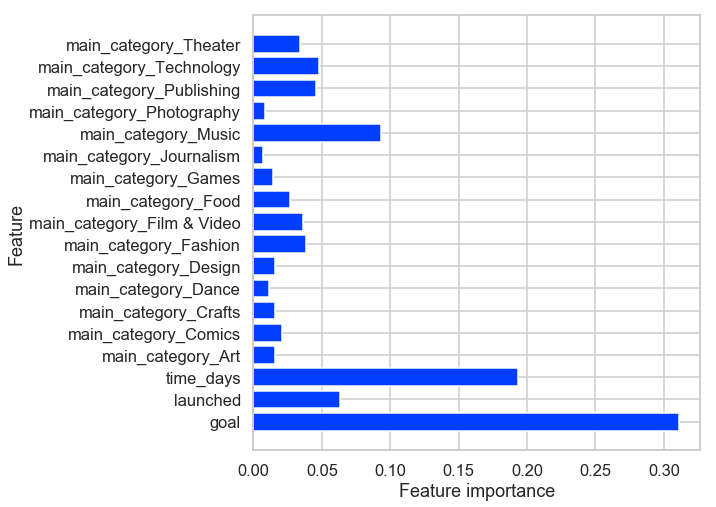

In [59]:
plot_feature_importances(forest, X_train)

### KNN

In [60]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [61]:
# find_best_k(X_train, y_train, X_test, y_test)

In [62]:
knn.score(X_train, y_train)

0.6671355850588154

In [63]:
y_pred = knn.predict(X_test)

In [64]:
print_metrics(y_test, y_pred)

Precision Score: 0.48788647087823084
Recall Score: 0.6307188054809487
Accuracy Score: 0.6105782453245324
F1 Score: 0.5501836592872034


In [65]:
roc_auc_score(y_test, y_pred)

0.6145391646781142

In [66]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,21666,14543,36209
1,8112,13855,21967
All,29778,28398,58176


### XGBoost

In [67]:
boost = xgb.XGBClassifier(max_depth=3, learning_rate=0.5, min_child_weight=10, subsample=0.7)
boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [68]:
boost.score(X_train, y_train)

0.7022253559881682

In [69]:
y_pred = boost.predict(np.array(X_test))

In [70]:
print_metrics(y_test, y_pred)

Precision Score: 0.5512913129853712
Recall Score: 0.5558337506259389
Accuracy Score: 0.6614583333333334
F1 Score: 0.5535532131927916


In [71]:
roc_auc_score(y_test, y_pred)

0.6406858001659066

In [72]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,26271,9938,36209
1,9757,12210,21967
All,36028,22148,58176


#### GridSearchCV Tuning

In [73]:
# param_grid = {
#     'max_depth': [3],
#     'learning_rate': [0.5],
#     'min_child_weight': [10],
#     'subsample': [0.7]
# }

In [74]:
# grid_clf = GridSearchCV(boost, param_grid, scoring='accuracy', cv=None, n_jobs=1)
# grid_clf.fit(X_train, y_train)

# best_parameters = grid_clf.best_params_

# print("GridSearchCV found the following optimal parameters: ")
# for param_name in sorted(best_parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

# training_preds = grid_clf.predict(X_train)
# val_preds = grid_clf.predict(np.array(X_test))
# training_accuracy = accuracy_score(y_train, training_preds)
# val_accuracy = accuracy_score(y_test, val_preds)

# print("")
# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

# Testing on other countries

## GB

In [75]:
gb = df[df['country'] == 'GB']

In [76]:
gb = pd.get_dummies(gb, columns=['main_category'])

In [77]:
y_test = gb['state']

In [78]:
gb = gb.drop(['state', 'ID', 'name', 'category', 'currency', 'deadline', 'pledged', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1)

### Decision Tree

In [79]:
y_pred = tree.predict(gb)

In [80]:
print_metrics(y_test, y_pred)

Precision Score: 0.5069374369323916
Recall Score: 0.6661141957404492
Accuracy Score: 0.6452144226161955
F1 Score: 0.575726103928661


In [81]:
roc_auc_score(y_test, y_pred)

0.6497511189722175

In [82]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,13507,7818,21325
1,4029,8038,12067
All,17536,15856,33392


### Random Forest

In [83]:
y_pred = forest.predict(gb)

In [84]:
print_metrics(y_test, y_pred)

Precision Score: 0.5171181339352897
Recall Score: 0.6834341592773681
Accuracy Score: 0.6549772400574988
F1 Score: 0.5887560235588079


In [85]:
roc_auc_score(y_test, y_pred)

0.6611543598262573

In [86]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,13624,7701,21325
1,3820,8247,12067
All,17444,15948,33392


### KNN

In [87]:
y_pred = knn.predict(gb)

In [88]:
print_metrics(y_test, y_pred)

Precision Score: 0.4698729184925504
Recall Score: 0.7108643407640672
Accuracy Score: 0.6056839961667465
F1 Score: 0.5657751541733997


In [89]:
roc_auc_score(y_test, y_pred)

0.628515406020955

In [90]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,11647,9678,21325
1,3489,8578,12067
All,15136,18256,33392


### XGBoost

In [91]:
y_pred = boost.predict(np.array(gb))

In [92]:
print_metrics(y_test, y_pred)

Precision Score: 0.530749846761561
Recall Score: 0.6458108892019557
Accuracy Score: 0.6656684235745088
F1 Score: 0.5826542056074767


In [93]:
roc_auc_score(y_test, y_pred)

0.6613579651168044

In [94]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,14435,6890,21325
1,4274,7793,12067
All,18709,14683,33392


## CA

In [95]:
ca = df[df['country'] == 'CA']

In [96]:
ca = pd.get_dummies(ca, columns=['main_category'])

In [97]:
y_test = ca['state']

In [98]:
ca = ca.drop([ 'state', 'ID', 'name', 'category', 'currency', 'deadline', 'pledged', 'backers', 'country', 'usd pledged', 'usd_pledged_real','usd_goal_real'], axis=1)

### Decesion Tree

In [99]:
y_pred = tree.predict(ca)

In [100]:
print_metrics(y_test, y_pred)

Precision Score: 0.42624949207639173
Recall Score: 0.5074987905176584
Accuracy Score: 0.6676695842450766
F1 Score: 0.463339222614841


In [101]:
roc_auc_score(y_test, y_pred)

0.6191450101301352

In [102]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7666,2824,10490
1,2036,2098,4134
All,9702,4922,14624


### Random forest

In [103]:
y_pred = forest.predict(ca)

In [104]:
print_metrics(y_test, y_pred)

Precision Score: 0.4443512890379375
Recall Score: 0.5128205128205128
Accuracy Score: 0.681003829321663
F1 Score: 0.4761370016844469


In [105]:
roc_auc_score(y_test, y_pred)

0.6300518198039646

In [106]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7839,2651,10490
1,2014,2120,4134
All,9853,4771,14624


### KNN

In [107]:
y_pred = knn.predict(ca)

In [108]:
print_metrics(y_test, y_pred)

Precision Score: 0.400879622088288
Recall Score: 0.5953072085147557
Accuracy Score: 0.6340946389496718
F1 Score: 0.4791200233622116


In [109]:
roc_auc_score(y_test, y_pred)

0.6223437853822588

In [110]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6812,3678,10490
1,1673,2461,4134
All,8485,6139,14624


### XGBoost

In [111]:
y_pred = boost.predict(np.array(ca))

In [112]:
print_metrics(y_test, y_pred)

Precision Score: 0.4554110543427775
Recall Score: 0.47435897435897434
Accuracy Score: 0.6910557986870897
F1 Score: 0.4646919431279621


In [113]:
roc_auc_score(y_test, y_pred)

0.6254063699249591

In [114]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8145,2345,10490
1,2173,1961,4134
All,10318,4306,14624
